## Submission 
For each ForecastId in the test set, you'll predict the cumulative COVID-19 cases and fatalities to date. The file should contain a header and have the following format:<br>

ForecastId,ConfirmedCases,Fatalities<br>
1,10,0<br>
2,10,0<br>
3,10,0<br>
etc.<br>
You will get the ForecastId for the corresponding date and location from the test.csv file.

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
path_train = 'covid19-global-forecasting-week-1/train.csv'
path_test = 'covid19-global-forecasting-week-1/test.csv'
path_sbumit = 'covid19-global-forecasting-week-1/submission.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17324 non-null  int64  
 1   Province/State  7930 non-null   object 
 2   Country/Region  17324 non-null  object 
 3   Lat             17324 non-null  float64
 4   Long            17324 non-null  float64
 5   Date            17324 non-null  object 
 6   ConfirmedCases  17324 non-null  float64
 7   Fatalities      17324 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Province/State  5590 non-null   object 
 2   Country/Region  12212 non-null  object 
 3   Lat             12212 non-null  float64
 4   Long            12212 non-null  float64
 5   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


# About the Data 
1. Contains Daily Reports of Number of Cases and Fatalities for countries.
2. [Missing Data]Contains some entries with Province/State Information.
3. Contains latitude and longitude for entries, same for all entries of a country or by province ?
4. Date - 22nd Feb to 22nd March
5. Country/Region - 163

### EDA

In [186]:
#df_train.iloc[5000:5050]

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
5000,7593,NaN,Congo (Brazzaville),-4.0383,21.7587,2020-03-21,3.0,0.0
5001,7594,NaN,Congo (Brazzaville),-4.0383,21.7587,2020-03-22,3.0,0.0
5002,7627,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-22,0.0,0.0
5003,7628,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-23,0.0,0.0
5004,7629,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-24,0.0,0.0
5005,7630,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-25,0.0,0.0
5006,7631,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-26,0.0,0.0
5007,7632,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-27,0.0,0.0
5008,7633,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-28,0.0,0.0
5009,7634,NaN,Congo (Kinshasa),-4.0383,21.7587,2020-01-29,0.0,0.0


In [56]:
# Dataset Dimesnions

print('Train shape', df_train.shape)

print('Test shape', df_test.shape)

# Missing/Null Values

print('\nTrain Missing\n', df_train.isnull().sum())
print('\nTest Missing\n', df_test.isnull().sum())

Train shape (17324, 8)
Test shape (12212, 6)

Train Missing
 Id                   0
Province/State    9394
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

Test Missing
 ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64


In [58]:
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')
Index(['ForecastId', 'Province/State', 'Country/Region', 'Lat', 'Long',
       'Date'],
      dtype='object')


In [63]:
# Lets get an idea of the unique countries in the dataset 

lst = df_train['Country/Region'].unique()
print('Total_Countries\n:', len(lst))
for i in lst:
    print(i)

Total_Countries
: 163
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Finland
France
French Guiana
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Greenland
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mayotte
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia

In [67]:
# Lets get the Date Range for the Dataset 

print(df_train['Date'].min(), ' - ', df_train['Date'].max())
df_train['Date']

2020-01-22  -  2020-03-22


0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
17319    2020-03-18
17320    2020-03-19
17321    2020-03-20
17322    2020-03-21
17323    2020-03-22
Name: Date, Length: 17324, dtype: object

### Checking Confirmed Cases and Fatalities for the World by each Date- Using GroupBy

In [89]:
# GroupBy syntax (columns to group by in list)[Columns to aggregate, apply function to] . aggregation functions on it 
train_cases_conf = df_train.groupby(['Date'])['ConfirmedCases'].sum()
train_cases_conf

Date
2020-01-22       539.0
2020-01-23       627.0
2020-01-24       901.0
2020-01-25      1347.0
2020-01-26      1959.0
                ...   
2020-03-18    212054.0
2020-03-19    239571.0
2020-03-20    268834.0
2020-03-21    300983.0
2020-03-22    332193.0
Name: ConfirmedCases, Length: 61, dtype: float64

In [88]:
train_fatal = df_train.groupby(['Date'])['Fatalities'].sum()
train_fatal

Date
2020-01-22       17.0
2020-01-23       18.0
2020-01-24       25.0
2020-01-25       41.0
2020-01-26       53.0
               ...   
2020-03-18     8691.0
2020-03-19     9824.0
2020-03-20    11256.0
2020-03-21    12928.0
2020-03-22    14588.0
Name: Fatalities, Length: 61, dtype: float64

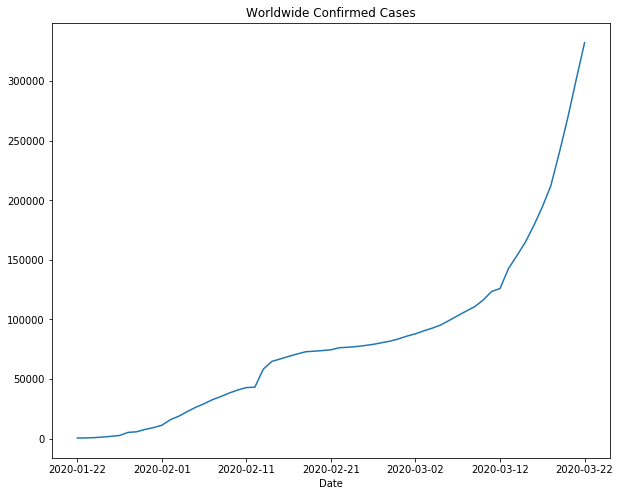

In [105]:
train_cases_conf.plot(figsize = (10,8), title = 'Worldwide Confirmed Cases')

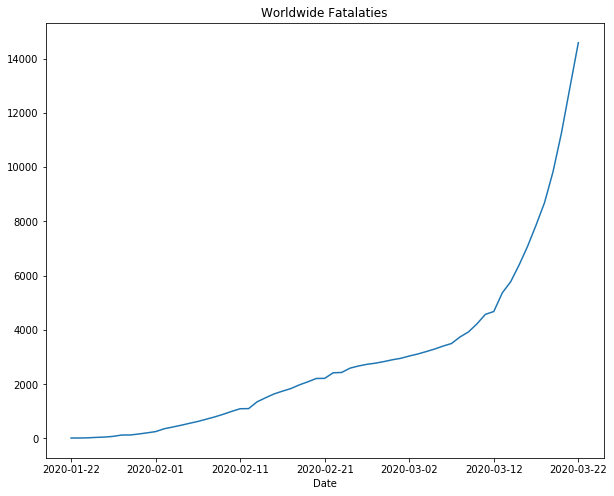

In [106]:
train_fatal.plot(figsize = (10,8), title = 'Worldwide Fatalaties')

In [103]:
# Checking Confirmed cases and fatalities for China

# Filtering out China
china_filt = df_train['Country/Region'] == 'China'
# 2013 Entries for China, Province Data is Also Present
# use loc to filter and then grouping 

train_conf_china = df_train.loc[china_filt].groupby(['Date'])['ConfirmedCases'].sum()
train_conf_china

Date
2020-01-22      533.0
2020-01-23      618.0
2020-01-24      882.0
2020-01-25     1321.0
2020-01-26     1921.0
               ...   
2020-03-18    78810.0
2020-03-19    78861.0
2020-03-20    78946.0
2020-03-21    78992.0
2020-03-22    79070.0
Name: ConfirmedCases, Length: 61, dtype: float64

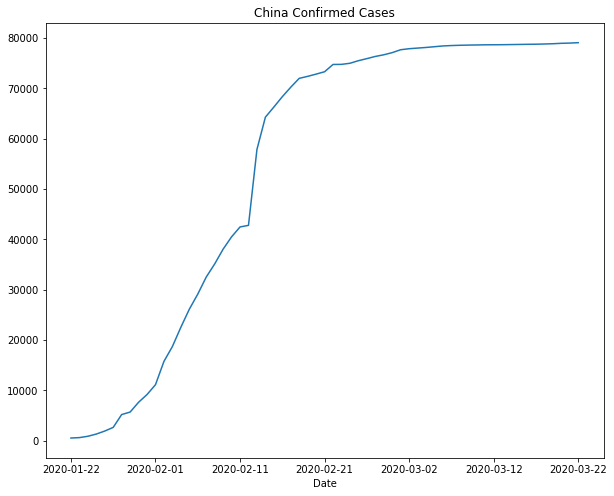

In [146]:
train_conf_china.plot(figsize = (10,8), title = 'China Confirmed Cases')

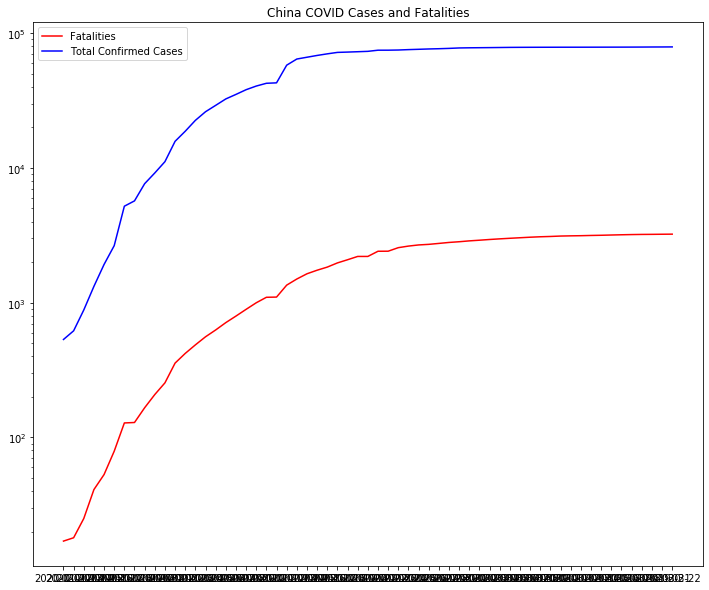

In [163]:
# grouping using same china filter to get fatalities on each date (grouped by date)
# groupby([list of columns to groupby]) [which columns to apply aggregate fx to ]. (aggregate function)


train_china_fatal = df_train.loc[china_filt].groupby(['Date'])['Fatalities'].sum()

#train_china_fatal.plot(figsize= (10,8) , title = 'China Total Fatalaties')

plt.figure(figsize=(12,10))
plt.axes(yscale ='log', )
plt.plot(train_china_fatal.index, train_china_fatal.tolist(), 'r', label = 'Fatalities')
plt.plot(train_conf_china.index, train_conf_china.tolist(), 'b', label = 'Total Confirmed Cases')
plt.title('China COVID Cases and Fatalities')
plt.legend()

In [180]:
# Checking Total Cases by Country 

# as_index = False to not make the grouping column the index, creates a df her instead of series, preserves
# Confirmedcases column

train_case_country = df_train.groupby(['Country/Region'], as_index=False)['ConfirmedCases'].sum()

# Sorting by number of cases
train_case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)
train_case_country

,Country/Region,ConfirmedCases
29,China,3342060.0
75,Italy,438821.0
71,Iran,231132.0
82,"Korea, South",172802.0
139,Spain,157432.0
...,...,...
149,The Gambia,0.0
148,The Bahamas,0.0
7,Aruba,0.0
122,Republic of the Congo,0.0


<BarContainer object of 5 artists>

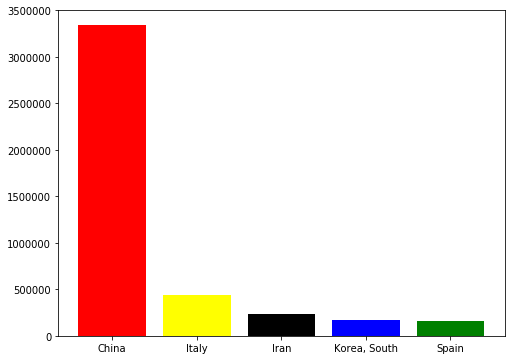

In [184]:
# Plotting bargraph for 5 most affected countries

plt.figure(figsize=(8,6))
plt.bar(train_case_country['Country/Region'][:5], train_case_country['ConfirmedCases'][:5], color = ['red', 'yellow','black','blue','green'])

#### No. of Cases on a Particular Day, (Not Increase, Cumulative)

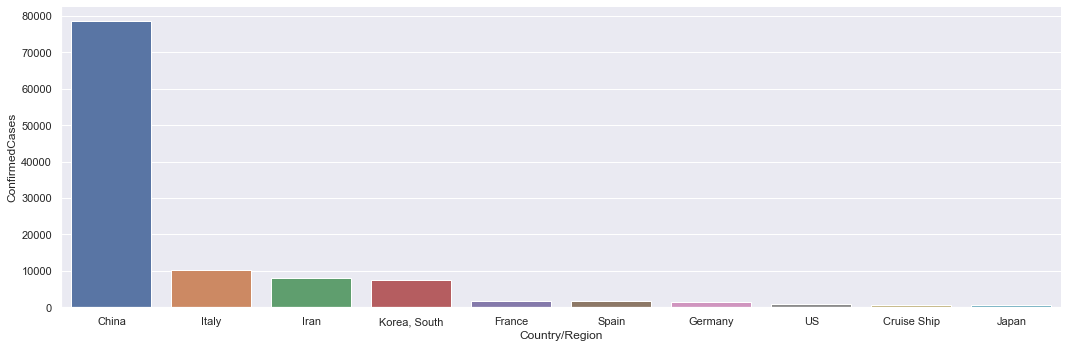

In [274]:
# Confirmed Cases till a particular day by country

Date = '2020-03-10'

train_case_country_march = df_train.groupby(['Country/Region', 'Date'], as_index=False)['ConfirmedCases'].sum()

# Filter for data for 23/03

df_23_3 = df_train['Date'] == Date

# Sort Values
# train_case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)

train_case_country_march = train_case_country_march.loc[df_23_3]

train_case_country_march.sort_values('ConfirmedCases', ascending = False, inplace = True)

sns.catplot(x = 'Country/Region', y = 'ConfirmedCases' , data = train_case_country_march.head(10), height=5,aspect=3, kind = 'bar')

# Data Wrangling/ Pre-processing/ Cleaning 
Process of converting or mapping data from original raw form into another format, preparing it for further analysis.
1. Identifying and Handling missing values.
2. Data Formating.
3. Data Normalization(centering and scaling).
4. Data bining.
5. Turning categorical values into numerical values.

In [193]:
# Dropping ID and getting rid of Province/State with NULL values 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17324 non-null  int64  
 1   Province/State  7930 non-null   object 
 2   Country/Region  17324 non-null  object 
 3   Lat             17324 non-null  float64
 4   Long            17324 non-null  float64
 5   Date            17324 non-null  object 
 6   ConfirmedCases  17324 non-null  float64
 7   Fatalities      17324 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [194]:
# lets get Cumulative sum of ConfirmedCases and Fatalities for each country on each data (same as original data)
# Doing to create copy without ID and 

train_country_date = df_train.groupby(['Country/Region', 'Date', 'Lat', 'Long'], as_index=False)['ConfirmedCases', 'Fatalities'].sum()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [200]:
print(train_country_date.info())
print(train_country_date.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17324 entries, 0 to 17323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  17324 non-null  object 
 1   Date            17324 non-null  object 
 2   Lat             17324 non-null  float64
 3   Long            17324 non-null  float64
 4   ConfirmedCases  17324 non-null  float64
 5   Fatalities      17324 non-null  float64
dtypes: float64(4), object(2)
memory usage: 947.4+ KB
None
Country/Region    0
Date              0
Lat               0
Long              0
ConfirmedCases    0
Fatalities        0
dtype: int64


### Feature Engineering
Splitting Date into day, month, day of week. <br>
First convert object to python datetime type <br>
Using pd.to_datetime()

In [202]:
train_country_date.Date = pd.to_datetime(train_country_date['Date'])
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17324 entries, 0 to 17323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  17324 non-null  object        
 1   Date            17324 non-null  datetime64[ns]
 2   Lat             17324 non-null  float64       
 3   Long            17324 non-null  float64       
 4   ConfirmedCases  17324 non-null  float64       
 5   Fatalities      17324 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 947.4+ KB


#### Using Pandas Series.dt.month
The month as January=1, December=12.

In [207]:
# Adding day, month, day of week columns 

train_country_date['Month'] = train_country_date['Date'].dt.month
train_country_date['Day'] = train_country_date['Date'].dt.day
train_country_date['Day_Week'] = train_country_date['Date'].dt.dayofweek

In [208]:
train_country_date.head()

,Country/Region,Date,Lat,Long,ConfirmedCases,Fatalities,Month,Day,Day_Week
0,Afghanistan,2020-01-22,33.0,65.0,0.0,0.0,1,22,2
1,Afghanistan,2020-01-23,33.0,65.0,0.0,0.0,1,23,3
2,Afghanistan,2020-01-24,33.0,65.0,0.0,0.0,1,24,4
3,Afghanistan,2020-01-25,33.0,65.0,0.0,0.0,1,25,5
4,Afghanistan,2020-01-26,33.0,65.0,0.0,0.0,1,26,6


In [231]:
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17324 entries, 0 to 17323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  17324 non-null  object        
 1   Date            17324 non-null  datetime64[ns]
 2   Lat             17324 non-null  float64       
 3   Long            17324 non-null  float64       
 4   ConfirmedCases  17324 non-null  float64       
 5   Fatalities      17324 non-null  float64       
 6   Month           17324 non-null  int64         
 7   Day             17324 non-null  int64         
 8   Day_Week        17324 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 1.3+ MB


#### Same Feature Engineering for Test Set

In [223]:
# First drop Province/State
#df_test.drop('Province/State', axis = 1, inplace = True)

# Converting Date Object to Datetime type

df_test.Date = pd.to_datetime(df_test['Date'])
df_test.head(2)

,ForecastId,Country/Region,Lat,Long,Date
0,1,Afghanistan,33.0,65.0,2020-03-12
1,2,Afghanistan,33.0,65.0,2020-03-13


In [228]:
# adding Month, DAy, Day_week columns Using Pandas Series.dt.month

df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['Day_Week'] = df_test['Date'].dt.dayofweek

In [230]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ForecastId      12212 non-null  int64         
 1   Country/Region  12212 non-null  object        
 2   Lat             12212 non-null  float64       
 3   Long            12212 non-null  float64       
 4   Date            12212 non-null  datetime64[ns]
 5   Month           12212 non-null  int64         
 6   Day             12212 non-null  int64         
 7   Day_Week        12212 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 763.4+ KB


#### Councatenating Train-Test to Label encode Country/Region Categorical Variable.
1. Make copy of train data without Confirmed Cases and Fatalities. Index - 0 to 17323
2. Concatenate train, test.
3. Label Encode Countries.
4. Add back Cofirmed Cases, Fatalities columns to clean_train_data.
5. Modelling
6. Saving Predicted Values with ForecastID

In [282]:
# train_country_date
# df_test
# Lets select the Common Labels and concatenate.

labels = ['Country/Region', 'Lat', 'Long', 'Date', 'Month', 'Day', 'Day_Week']

df_train_clean = train_country_date[labels]
df_test_clean = df_test[labels]

data_clean = pd.concat([df_train_clean, df_test_clean], axis = 0)

In [286]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29536 entries, 0 to 12211
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  29536 non-null  object        
 1   Lat             29536 non-null  float64       
 2   Long            29536 non-null  float64       
 3   Date            29536 non-null  datetime64[ns]
 4   Month           29536 non-null  int64         
 5   Day             29536 non-null  int64         
 6   Day_Week        29536 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.8+ MB


## Modeling - Regression Problem 
Using features Country/Region, Lat, Long, Month, Day, Day_week.<br>
To predict ConfirmedCases, Fatalities.
### To predict 2 Different Target Variables, Train two classifiers, one for each ?

## Preparing Data For Models

In [319]:
from sklearn.preprocessing import LabelEncoder

In [291]:
# Label Encoder for Countries 

enc = LabelEncoder()
data_clean['Country'] = enc.fit_transform(data_clean['Country/Region'])
data_clean

,Country/Region,Lat,Long,Date,Month,Day,Day_Week,Country
0,Afghanistan,33.0000,65.0000,2020-01-22,1,22,2,0
1,Afghanistan,33.0000,65.0000,2020-01-23,1,23,3,0
2,Afghanistan,33.0000,65.0000,2020-01-24,1,24,4,0
3,Afghanistan,33.0000,65.0000,2020-01-25,1,25,5,0
4,Afghanistan,33.0000,65.0000,2020-01-26,1,26,6,0
...,...,...,...,...,...,...,...,...
12207,Zambia,-15.4167,28.2833,2020-04-19,4,19,6,162
12208,Zambia,-15.4167,28.2833,2020-04-20,4,20,0,162
12209,Zambia,-15.4167,28.2833,2020-04-21,4,21,1,162
12210,Zambia,-15.4167,28.2833,2020-04-22,4,22,2,162


In [295]:
# Dropping Country/Region and Date

#data_clean.drop(['Country/Region', 'Date'], axis = 1, inplace=True)

### Splitting Back into Train and Test

In [297]:
data_train_clean = data_clean[:17324]

In [312]:
data_test_clean = data_clean[17324:]

### Adding Back Confirmed Cases and Fatalities
Using original df_train, check shape is same, head, tail have same values. ORDER NEEDS TO BE SAME.

In [308]:
df_train[['ConfirmedCases', 'Fatalities']]

,ConfirmedCases,Fatalities
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
17319,2.0,0.0
17320,2.0,0.0
17321,2.0,0.0
17322,2.0,0.0


In [306]:
data_train_clean.tail(5)

,Lat,Long,Month,Day,Day_Week,Country
17319,-15.4167,28.2833,3,18,2,162
17320,-15.4167,28.2833,3,19,3,162
17321,-15.4167,28.2833,3,20,4,162
17322,-15.4167,28.2833,3,21,5,162
17323,-15.4167,28.2833,3,22,6,162


In [314]:
data_train_clean[['ConfirmedCases', 'Fatalities']] = df_train[['ConfirmedCases', 'Fatalities']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Creating Features and Two Labels

In [315]:
x = data_train_clean[['Lat', 'Long', 'Month', 'Day', 'Day_Week', 'Country']]
y_case = data_train_clean[['ConfirmedCases']]
y_fatal = data_train_clean[['Fatalities']]

### Train-Test Split - Confirmed Cases

In [338]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_case, test_size = 0.3, random_state = 42)

### Train-Test Split - Fatalities

In [351]:
from sklearn.model_selection import train_test_split

x_train_fatal, x_test_fatal, y_train_fatal, y_test_fatal = train_test_split(x, y_fatal, test_size = 0.3, random_state = 42)

# Modelling
## <b>1. Linear Regression (Baseline Model) - No way Data Is Linear<br></b>
<p> 1.5% Train Accuracy for Confirmed Cases <br>
    1% Train Accuracy for Fatalities
    

#### For Confirmed Cases

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()

clf.fit(x_train, y_train)

# R^2 Score
clf.score(x_train, y_train)

0.015796285262613785

In [342]:
# R^2 on test set 

clf.score(x_test, y_test)

# MSE on test set

y_pred_case = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred_case))

10484166.256193016


In [366]:
# Training for entire dataset and then Predicting Values, many negative
clf.fit(x, y_case)
y_predicted_cases_test = clf.predict(data_test_clean)
y_predicted_cases_test.shape

(12212, 1)

#### For Fatalities

In [362]:
clf.fit(x_train_fatal, y_train_fatal)
clf.score(x_train_fatal, y_train_fatal)

0.010088492247989467

In [363]:
# R2 for test 
clf.score(x_test_fatal, y_test_fatal)
# MSE for test 
y_pred_fatal = clf.predict(x_test_fatal)
print(mean_squared_error(y_test, y_pred_case))

10484166.256193016


In [365]:
# Training on entire set and Predicting Values 

clf.fit(x, y_fatal)
y_predicted_fatal_test = clf.predict(data_test_clean)
y_predicted_fatal_test.shape

(12212, 1)

#### Saving Predictions 

In [368]:
# Read Predictions CSV

submission = pd.read_csv(path_sbumit)

In [374]:
submission['ConfirmedCases'] = y_predicted_cases_test
submission['Fatalities'] = y_predicted_fatal_test
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,749.637979,27.410700
1,2,877.735274,32.614637
2,3,1005.832570,37.818573
3,4,1133.929866,43.022510
4,5,409.054388,13.913183


In [375]:
submission.to_csv('submission_base_linear_reg.csv', index = False)